
MÁSTER BIG DATA & DATA ENGINEERING

Programación avanzada en Python

Autores: Luis Llana Díaz & Yolanda García Ruiz



# Trabajo final

## Nota Preliminar

Antes de desarrollar el proyecto, es aconsejable leer el enunciado completamente, incluyendo las instrucciones de entrega y otros consejos que se  recogen al final de este enunciado.
En este enunciado se pueden producir cambios durante su desarrollo por distintos motivos: porque se descubre una situación anómala que no ha sido prevista al preparar el enunciado, porque algún estudiante encuentre un error o ambigüedad en la descripción o en los datos de partida o por cualquier otra causa. Esto ocurre también en cualquier proyecto real, así que tomárselo con el mejor talante y aprender también de estas eventuales contingencias. Se procurará informar debidamente del mejor modo posible cuando esto se produzca.


## Introducción

En el portal de datos abiertos de la EMT de Madrid se puede encontrar abundante información sobre transporte y movilidad de la ciudad. En particular los datos relativos a la utilización del servicio de bicicletas eléctricas del ayuntamiento de Madrid.
La dirección del portal mencionado es la siguiente:

https://opendata.emtmadrid.es/Home

y el enlace donde se encuentran los datos relativos a BiciMAD es el siguiente:

https://opendata.emtmadrid.es/Datos-estaticos/Datos-generales-(1)

En esta página podemos encontrar los datos de uso de BiciMAD por meses desde abril de 2019 hasta el mes Febrero de 2023. Se trata de un conjunto de URLs a ficheros comprimidos ZIP, donde una vez descomprimidos, podemos encontrar un fichero en formato `csv`.
En esta práctica __solo nos va a interesar los datos de uso desde junio el 2021__. Son ficheros con nombre:

`
trips_YY_MM_monthName.csv
`

donde `YY` representa el año, `MM` representa el mes y `monthName` representa el nombre del mes en inglés.

Los datos del mes 10 del año 2021 está mal generado por la EMT, por lo que se pide que no se use ese fichero.

### Metadatos

En cada uno de los ficheros `csv` podemos encontrar los siguientes datos:

* `date` (Fecha): La fecha en la que tuvo lugar el viaje.
* `idbike` (ID de Bicicleta): El identificador único de la bicicleta utilizada para el viaje.
* `fleet` (Flota): La flota a la que pertenece la bicicleta utilizada.
* `trip_minutes` (Duración del Viaje en Minutos): La duración del viaje en minutos.
* `geolocation_unlock` (Geolocalización de Desbloqueo): Las coordenadas geográficas del lugar de inicio del viaje.
* `address_unlock` (Dirección de Desbloqueo): La dirección postal en la que se desbloqueó la bicicleta.
* `unlock_date` (Fecha y Hora de Desbloqueo): La fecha y hora exactas en las que comenzó el viaje.
* `locktype` (Tipo de Bloqueo): El estado de la bicicleta antes del viaje. Puede estar anclada en una estación o simplemente bloqueada en cualquier lugar libremente.
* `unlocktype` (Tipo de Desbloqueo): El estado de la bicicleta después del viaje.
* `geolocation_lock` (Geolocalización de Bloqueo): Las coordenadas geográficas del lugar final del viaje.
* `address_lock` (Dirección de Bloqueo): La dirección postal en la que se bloqueó la bicicleta.
* `lock_date` (Fecha y Hora de Bloqueo): La fecha y hora exactas en las que finalizó el viaje.
* `station_unlock` (Número de Estación de Desbloqueo): El número de la estación en la que la bicicleta estaba anclada antes del viaje, si la había.
* `dock_unlock` (Muelle de Desbloqueo): El muelle de la estación en la que la bicicleta estaba anclada antes del viaje, si la había.
*  `unlock_station_name` (Nombre de la Estación de Desbloqueo): El nombre de la estación en la que la bicicleta estaba anclada antes del viaje, si la había.
* `station_lock` (Número de Estación de Bloqueo): El número de la estación en la que la bicicleta estaba anclada después del viaje, si la había.
* `dock_lock` (Muelle de Bloqueo): El muelle de la estación en la que la bicicleta estaba anclada después del viaje, si la había.
* `lock_station_name` (Nombre de la Estación de Bloqueo): El nombre de la estación en la que la bicicleta estaba anclada después del viaje, si la había.

## Librerías

Importar todas las librerías necesarias al principio, tal como propone el estilo `pep-8`. Ej.:
<a href="https://www.python.org/dev/peps/pep-0008/">PEP 8 -- Style Guide for Python Code</a>.

In [1]:
# Sol

import requests
import os
import sys
import zipfile
from subprocess import Popen, PIPE
import io
from typing import TextIO
import csv
import pandas as pd
from io import TextIOWrapper
import logging


## ETAPA 1. Análisis exploratorio y consultas.



### La descarga de los ficheros

En este notebook vamos a estudiar únicamente los datos de febrero de 2023.
La URL que permite descargar dichos datos es la siguiente:

In [2]:
url = "https://opendata.emtmadrid.es/getattachment/7a88cb04-9007-4520-88c5-a94c71a0b925/trips_23_02_February-csv.aspx"

Observa que en la URL aparece la cadena `trips_23_02`, y que el fichero ZIP tiene un archivo de datos en formato csv llamado `trips_23_02_February.csv`.


__Se pide:__
 Escribir una función llamada `csv_from_zip` que reciba como único argumento un string que represente la URL al fichero ZIP de datos de uso y devuelva un fichero en formato CSV. El tipo del objeto devuelto es `TextIO`. La función  lanzará una excepción de tipo `ConnectionError` en caso de que falle la petición al servidor de la EMT.

__Observaciones:__
En el notebook `05_ficheros` del módulo de `Secuencias` se habla del manejo de ficheros en formato ZIP, y de cómo leer un fichero, transformarlo en una cadena de caracteres para posteriormente, usando el método `String.IO`, obtener un fichero de texto.
Deberás importar el módulo `typing`.

In [116]:
# Solución:
def csv_from_zip(url: str) -> TextIO:
    try:
        file = requests.get(url) 
        with open("hola.zip",'wb') as desc:
            contenido = file.content
            desc.write(contenido)
        desc.close()
        with zipfile.ZipFile("hola.zip","r") as o:
            o.extract("trips_23_02_February.csv")
        o.close()
        path = "trips_23_02_February.csv"
        bytesFloren = io.BytesIO(contenido)
        zfile = zipfile.ZipFile(bytesFloren)
        name = zfile.filelist[0].filename
        with zfile.open(name,'r') as f:
            contents = f.read()
            contentstr = contents.decode('utf-8')
            fstr = io.StringIO(contentstr)
            reader = csv.DictReader(fstr,delimiter=';')
        f.close()
        zfile.close()
        # there should be here a f.close() but if i write it, the program does not work
    except ConnectionError as e:
        e
    return path
   

In [117]:
# Prueba
csvfile = csv_from_zip(url)

### Creación del dataframe de datos

__Se pide:__
Crear una función llamada `get_data` que reciba como único argumento un fichero csv y que devuelva un objeto de tipo DataFrame con las siguientes restricciones:
* El índice del dataframe debe ser a fecha en la que tuvo lugar el viaje (usa el argumento `index_col`).
* Todas las fechas que aparecen en los datos ha de tener tipo `datetime` (usa el argumento 'parse_dates`).
* De todas las columnas que hay en el fichero, solo nos interesan las siguientes:

   ```
     [ 'idBike', 'fleet', 'trip_minutes', 'geolocation_unlock', 'address_unlock', 'unlock_date', 'locktype',
     'unlocktype', 'geolocation_lock', 'address_lock', 'lock_date', 'station_unlock', 'unlock_station_name',
     'station_lock', 'lock_station_name']
   ```
por lo que el dataframe ha de tener solo dichas columnas.

__Observaciones:__ Observa que los datos de usos que publica la EMT son fichero CSV donde el separador de campos es el símbolo `;`.

In [3]:
# Solución
def get_data(csvfile):
    df = pd.read_csv(csvfile,delimiter=';',index_col='unlock_date',encoding='utf-8',parse_dates=['unlock_date','lock_date'],usecols=['idBike', 'fleet', 'trip_minutes', 'geolocation_unlock', 'address_unlock', 'unlock_date', 'locktype',
     'unlocktype', 'geolocation_lock', 'address_lock', 'lock_date', 'station_unlock', 'unlock_station_name',
     'station_lock', 'lock_station_name'])
    return df

In [4]:
# prueba
csvfile = csv_from_zip(url)
back = get_data(csvfile)
back.head()

NameError: name 'csv_from_zip' is not defined

### Explorar la estructura de los datos en el dataframe

El método `info` devuelve información acerca de la estructura de un dataframe.

__Se pide:__
Escribe el código necesario para crear un dataframe llamado `usos` a partir de la url "https://opendata.emtmadrid.es/getattachment/7a88cb04-9007-4520-88c5-a94c71a0b925/trips_23_02_February-csv.aspx".
Ejecuta el método `info()` sobre el dataframe y comenta los resultados.
Fíjate en las columnas que representan fechas y comprueba su tipo de datos. ¿Cuántas filas se han cargado?. Fíjate en los valores distintos de `NaN` en cada una de las columnas.

In [5]:
# Solución
def return_df(url):
    r = requests.get(url)
    bytes = io.BytesIO(r.content)
    with zipfile.ZipFile(bytes,'r') as r:
        esta = r.namelist()[0]
        with r.open(esta,'r') as f:
                    usos = pd.read_csv(f,encoding='latin-1',sep=';')
        f.close()
    r.close()
    return usos
url1 = "https://opendata.emtmadrid.es/getattachment/7a88cb04-9007-4520-88c5-a94c71a0b925/trips_23_02_February-csv.aspx"    
usos = return_df(url1)
usos.info()

# 1.- El dataframe 'usos' se han cargado 336988 filas
# 2.- El tipo de dato que tienen las columnas son de tipo objeto y de tipo float64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336988 entries, 0 to 336987
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   fecha                168494 non-null  object 
 1   idBike               168494 non-null  float64
 2   fleet                168494 non-null  float64
 3   trip_minutes         168494 non-null  float64
 4   geolocation_unlock   168494 non-null  object 
 5   address_unlock       168494 non-null  object 
 6   unlock_date          168494 non-null  object 
 7   locktype             168494 non-null  object 
 8   unlocktype           168494 non-null  object 
 9   geolocation_lock     168494 non-null  object 
 10  address_lock         168494 non-null  object 
 11  lock_date            168494 non-null  object 
 12  station_unlock       168114 non-null  float64
 13  dock_unlock          168114 non-null  float64
 14  unlock_station_name  168114 non-null  object 
 15  station_lock     

### Borrado de valores NaN.

El método  `dropna` de los DataFrames tiene un argumento `how` que permite indicar que se borren filas o columnas donde todos los valores son `NaN`.

__Se pide:__ Crear una función llamada `delete_nan_rows` que borre las filas con todos sus valores `NaN` de un dataframe recibido como argumento. La función modifica el dataframe y no devuelve nada.  

Comenta los resultados. Prueba la función `delete_nan_rows` con el dataframe `usos`. Comprueba que el número de filas del dataframe `usos` ha cambiado. Puedes volver a ejecutar el método `info` y compáralo con el resultado antes de invocar a la función `delete_nan_rows`.

In [6]:
# Solución
usos.info()
def delete_nan_rows(df):
    df = df.dropna(how='any')
    return df
floren = delete_nan_rows(usos)
floren.info()
filas_before_nan = 336988
filas_after_nan = 167946
logging.info(f"Numero de filas que ha cambiado el dataframe usos {filas_before_nan} - {filas_after_nan}")
# Por lo que hemos visto en el 1 dataframe tenia muchisimos nulos por lo que hemos echo una limpieza del dataframe usando el atributo nan,
# removiendo asi todas las filas que tuvieran valores nulos
# Se nota la diferencia de filas, ya que la memoria esta mas optima y tenemos datos limpios

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336988 entries, 0 to 336987
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   fecha                168494 non-null  object 
 1   idBike               168494 non-null  float64
 2   fleet                168494 non-null  float64
 3   trip_minutes         168494 non-null  float64
 4   geolocation_unlock   168494 non-null  object 
 5   address_unlock       168494 non-null  object 
 6   unlock_date          168494 non-null  object 
 7   locktype             168494 non-null  object 
 8   unlocktype           168494 non-null  object 
 9   geolocation_lock     168494 non-null  object 
 10  address_lock         168494 non-null  object 
 11  lock_date            168494 non-null  object 
 12  station_unlock       168114 non-null  float64
 13  dock_unlock          168114 non-null  float64
 14  unlock_station_name  168114 non-null  object 
 15  station_lock     

###  Exploración de las columnas.

La columna `fleet` representa el tipo de flota de bicicleta eléctrica.
Las BiciMAD Go son free floating y se corresponden con tipo de flota 2. A diferencia de las BiciMAD normales, no tienen por qué dejarse en una estación de bicicletas, aunque existe la posibilidad de hacerlo. Su bloqueo se realiza por medio de un candado manual, aspecto en el que se diferencian de las otras bicis municipales.

Por otro lado, las columnas `locktype` y `unlocktype` tienen información del tipo de bloqueo y desbloqueo respectivamente.

__Se pide:__
* ¿Cuántos valores distintos hay en la columna `fleet` del dataframe `usos`?
* ¿Cuántos valores distintos hay en las columnas `locktype` y `unlocktype` del dataframe `usos`?

In [7]:
# Sol
usos['fleet'].unique()
# hay 3 valores distintos nan, 1. y 2.
# como no hemos echo un return del ultimo dataframe, entonces sigue habiendo nulos
# en el caso de que si hubieramos echo un return del utlimo dataframe solo habria dos valores unicos, porque el nan no estaria

usos['locktype'].unique()
# hay 3 valores distintos nan, STATION y FREE
# como no hemos echo un return del ultimo dataframe, entonces sigue habiendo nulos
# en el caso de que si hubieramos echo un return del utlimo dataframe solo habria dos valores unicos, porque el nan no estaria

usos['unlocktype'].unique()
# hay 3 valores distintos nan, STATION y FREE
# como no hemos echo un return del ultimo dataframe, entonces sigue habiendo nulos
# en el caso de que si hubieramos echo un return del utlimo dataframe solo habria dos valores unicos, porque el nan no estaria

array([nan, 'STATION', 'FREE'], dtype=object)

### Cambio de tipo de datos

Las columnas  `idBike` y `fleet`  tienen tipo float, pero en realidad representan un identificador de bicicleta y de flota respectivamente.

__Se pide:__ Crear una función llamada `float_to_str` que cambie el tipo de una columna a tipo string. La función recibe como argumentos un dataframe y el nombre de una columna. La función no devuelve nada.
Si la columna no se encuentra entre las columnas del dataframe, la función no hace nada.

__Observaciones:__ Puedes usar la función `map` para aplicar la función de transformación.

Prueba la función con el datafame `usos` y  las columnas `idBike` y `fleet`.
De esta forma, el identificador de bicicleta `7337.0` pasará a ser `'7337'`. Ejecuta la función `info` sobre el dataframe `usos` para comprobar que los tipos asociados a esas columnas han cambiado.

In [8]:
# Solución
def float_to_str(df,columna):
    if columna in df.columns:
        df[columna] = df[columna].astye(str)
    return df[columna]

y = list(map(float_to_str,'idBike'))
y.info()

TypeError: float_to_str() missing 1 required positional argument: 'columna'

## Consultas

Las siguientes consultas se realizarán con el dataframe `usos` creado en los apartados anteriores.

### C1

¿Cuántas bicicletas han sido desbloqueadas de una estación y no se bloquean en ninguna?

In [9]:
# Sol
usos.loc[(usos['unlocktype'] == 'STATION') & (usos['locktype'] != 'STATION')]

,fecha,idBike,fleet,trip_minutes,geolocation_unlock,address_unlock,unlock_date,locktype,unlocktype,geolocation_lock,address_lock,lock_date,station_unlock,dock_unlock,unlock_station_name,station_lock,dock_lock,lock_station_name
3633,2023-02-01,5345.0,2.0,12.45,"{'type': 'Point', 'coordinates': [-3.6657777, ...",'Calle Alcalde SÃ¡inz de Baranda frente al nÂº...,2023-02-01T08:43:17,FREE,STATION,"{'type': 'Point', 'coordinates': [-3.6904133, ...","'28007,ES,Madrid,Madrid,Plaza del Embarcadero ...",2023-02-01T08:55:44,190.0,19.0,182 - Parque Roma,NaN,NaN,NaN
3851,2023-02-01,7007.0,2.0,6.15,"{'type': 'Point', 'coordinates': [-3.7007111, ...",'Calle Valencia nÂº 1',2023-02-01T08:49:36,FREE,STATION,"{'type': 'Point', 'coordinates': [-3.6958516, ...","'28014,ES,Madrid,Madrid,Calle del MarquÃ©s de ...",2023-02-01T08:55:45,57.0,18.0,53 - Plaza de LavapiÃ©s,NaN,NaN,NaN
3877,2023-02-01,5635.0,2.0,16.15,"{'type': 'Point', 'coordinates': [-3.6751352, ...",'Avenida del MediterrÃ¡neo nÂº 19',2023-02-01T08:50:17,FREE,STATION,"{'type': 'Point', 'coordinates': [-3.6880866, ...","'28001,ES,Madrid,Madrid,Calle de Serrano ,Madrid'",2023-02-01T09:06:26,80.0,10.0,76 - Puerta de Mariano de Cavia,NaN,NaN,NaN
6685,2023-02-01,6957.0,2.0,2.48,"{'type': 'Point', 'coordinates': [-3.71383, 40...",'Calle Beatriz de Bobadilla frente al nÂº 2',2023-02-01T10:21:48,FREE,STATION,"{'type': 'Point', 'coordinates': [-3.7105616, ...","'28039,ES,Madrid,Madrid,Avenida de Pablo igles...",2023-02-01T10:24:17,264.0,16.0,256 - Reina Victoria,NaN,NaN,NaN
10779,2023-02-01,5559.0,2.0,8.35,"{'type': 'Point', 'coordinates': [-3.6758555, ...",'Calle Juan Bravo nÂº 50',2023-02-01T14:36:50,FREE,STATION,"{'type': 'Point', 'coordinates': [-3.6569983, ...","'28017,ES,Madrid,Madrid,Calle de Ignacio ellac...",2023-02-01T14:45:11,170.0,20.0,144 - Juan Bravo 50,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269041,2023-02-14,5464.0,2.0,18.60,"{'type': 'Point', 'coordinates': [-3.6933463, ...",'Calle Santa Isabel nÂº 57',2023-02-14T18:59:57,FREE,STATION,"{'type': 'Point', 'coordinates': [-3.7106183, ...","'28015,ES,Madrid,Madrid,Calle de los Reyes 18,...",2023-02-14T19:18:33,54.0,16.0,50 - Museo Reina SofÃ­a,NaN,NaN,NaN
269861,2023-02-14,7096.0,2.0,4.17,"{'type': 'Point', 'coordinates': [-3.7081246, ...",'Plaza de Santo Domingo nÂº 1',2023-02-14T19:24:28,FREE,STATION,"{'type': 'Point', 'coordinates': [-3.702235, 4...","'28004,ES,Madrid,Madrid,Plaza de San ildefonso...",2023-02-14T19:28:38,26.0,21.0,23 - Santo Domingo,NaN,NaN,NaN
273183,2023-02-14,7007.0,2.0,10.97,"{'type': 'Point', 'coordinates': [-3.6691524, ...",'Calle Jorge Juan nÂº 131',2023-02-14T22:16:59,FREE,STATION,"{'type': 'Point', 'coordinates': [-3.686565, 4...","'28045,ES,Madrid,Madrid,Calle de MÃ©ndez Ã¡lva...",2023-02-14T22:27:57,106.0,20.0,101 - Jorge Juan,NaN,NaN,NaN
273919,2023-02-14,6862.0,2.0,6.48,"{'type': 'Point', 'coordinates': [-3.6954403, ...",'Plaza de Alonso MartÃ­nez nÂº 5',2023-02-14T23:50:34,FREE,STATION,"{'type': 'Point', 'coordinates': [-3.710075, 4...","'28015,ES,Madrid,Madrid,Calle de San ignacio d...",2023-02-14T23:57:03,9.0,23.0,8 - Alonso MartÃ­nez,NaN,NaN,NaN


### C2

Seleccionar solo las bicicletas del tipo de flota '1' . El nuevo dataframe se ha de llamar `regular_fleet`.

In [10]:
# Sol
regular_fleet = usos[usos['fleet'] == 1]
regular_fleet

,fecha,idBike,fleet,trip_minutes,geolocation_unlock,address_unlock,unlock_date,locktype,unlocktype,geolocation_lock,address_lock,lock_date,station_unlock,dock_unlock,unlock_station_name,station_lock,dock_lock,lock_station_name
1,2023-02-01,7337.0,1.0,5.52,"{'type': 'Point', 'coordinates': [-3.6956178, ...",'Calle JesÃºs nÂº 1',2023-02-01T00:00:10,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.7088337, ...",'Plaza de la Cebada nÂº 16 ',2023-02-01T00:05:41,31.0,3.0,27 - Huertas,43.0,3.0,39 - Plaza de la Cebada
3,2023-02-01,5098.0,1.0,0.32,"{'type': 'Point', 'coordinates': [-3.7022591, ...",'Glorieta de Embajadores nÂº 2',2023-02-01T00:00:25,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.7022591, ...",'Glorieta de Embajadores nÂº 2',2023-02-01T00:00:44,52.0,22.0,48 - Embajadores 2,52.0,22.0,48 - Embajadores 2
5,2023-02-01,6519.0,1.0,0.27,"{'type': 'Point', 'coordinates': [-3.6894193, ...",'Calle Antonio Maura nÂº 15',2023-02-01T00:00:36,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.6894193, ...",'Calle Antonio Maura nÂº 15',2023-02-01T00:00:52,69.0,9.0,65 - Antonio Maura,69.0,9.0,65 - Antonio Maura
7,2023-02-01,2551.0,1.0,8.58,"{'type': 'Point', 'coordinates': [-3.7022591, ...",'Glorieta de Embajadores nÂº 2',2023-02-01T00:00:53,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.6991147, ...",'Calle Atocha nÂº 54',2023-02-01T00:09:28,52.0,23.0,48 - Embajadores 2,45.0,3.0,41 - AntÃ³n MartÃ­n
9,2023-02-01,6519.0,1.0,0.20,"{'type': 'Point', 'coordinates': [-3.6894193, ...",'Calle Antonio Maura nÂº 15',2023-02-01T00:00:57,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.6894193, ...",'Calle Antonio Maura nÂº 15',2023-02-01T00:01:09,69.0,9.0,65 - Antonio Maura,69.0,9.0,65 - Antonio Maura
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336979,2023-02-18,7492.0,1.0,1.33,"{'type': 'Point', 'coordinates': [-3.7065376, ...",'Calle Jacometrezo nÂº 3',2023-02-18T04:25:31,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.7065376, ...",'Calle Jacometrezo nÂº 3',2023-02-18T04:26:51,25.0,15.0,22 - Jacometrezo,25.0,11.0,22 - Jacometrezo
336981,2023-02-18,5538.0,1.0,9.48,"{'type': 'Point', 'coordinates': [-3.7065376, ...",'Calle Jacometrezo nÂº 3',2023-02-18T04:27:30,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.7074453, ...",'Calle San Vicente Ferrer nÂº 64',2023-02-18T04:36:59,25.0,5.0,22 - Jacometrezo,16.0,9.0,15 - San Vicente Ferrer
336983,2023-02-18,6473.0,1.0,0.47,"{'type': 'Point', 'coordinates': [-3.6726019, ...",'Calle Doctor Esquerdo nÂº 191',2023-02-18T04:39:38,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.6726019, ...",'Calle Doctor Esquerdo nÂº 191',2023-02-18T04:40:06,89.0,23.0,84 - Valderribas,89.0,23.0,84 - Valderribas
336985,2023-02-18,5252.0,1.0,7.43,"{'type': 'Point', 'coordinates': [-3.690358964...",'Calle Sodio nÂº 1B',2023-02-18T04:42:50,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.7064516, ...",'Paseo de la Esperanza nÂº 2',2023-02-18T04:50:16,243.0,1.0,235 - Embajadores 191,134.0,13.0,163 - Paseo de la Esperanza


### C3

Crea una función llamada `day_time` para calcular las horas totales de uso de bicicletas por día del mes.
La función recibe un dataframe y devuelve una Serie donde el índice es la fecha y el valor es el número de horas.

Prueba la función anterior con el dataframe  `usos`.

__Opcional:__ Dibuja un diagrama de barras con el resultado de la función `day_time` sobre el dataframe `usos`. Utiliza el módulo `matplotlib.pyplot`.

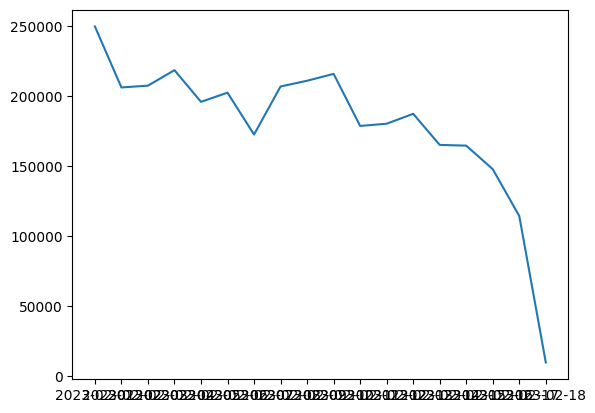

In [14]:
# Sol
import matplotlib.pyplot as plt
def day_time(df) -> pd.Series:
    array = df['trip_minutes'].groupby(df['fecha'])
    ser = pd.Series(array.sum())
    
    return ser
serie = day_time(usos)
serie
plt.plot(serie)
# cambiar grafica a barras

### C4

Crea una función llamada `weekday_time` para calcular las horas totales de uso de bicicletas por día de la semana. La función recibe un dataframe y devuelve una Serie donde el índice es el día de la semana (L, M, X, J, V, S, D) y el valor es el número de horas.

Prueba la función anterior con el dataframe usos.



In [15]:
# Solución
def weekday_time(dataframe):
    dataframe['fecha'] = pd.to_datetime(dataframe['fecha'])
    hours_per_day = dataframe.groupby(dataframe['fecha'].dt.strftime('%A'))['trip_minutes'].sum() / 3600
    # cambiar a 60
    convert_days = {
        'Monday': 'L',
        'Tuesday': 'M',
        'Wednesday': 'X',
        'Thursday': 'J',
        'Friday': 'V',
        'Saturday': 'S',
        'Sunday': 'D'
    }
    print(type(hours_per_day))
    hours_per_day.index = hours_per_day.index.map(convert_days)
    return hours_per_day

result = weekday_time(usos)
result

<class 'pandas.core.series.Series'>


fecha
V    149.304567
L    108.241475
S    113.017161
D    104.459369
J    156.877422
M     93.774011
X    172.494328
Name: trip_minutes, dtype: float64

### C5

Crea una función llamada `total_usage_day` para calcular el número total de usos de bicicletas por día del mes. La función recibe un dataframe y devuelve una Serie donde el índice es la fecha y el valor es el número de usos.

Prueba la función anterior con el dataframe usos.



In [16]:
# Sol
def total_usage_day(df) -> pd.Series:
    df['fecha'] = pd.to_datetime(df['fecha'])
    cont = df.groupby('fecha').count()
    return cont
c5 = total_usage_day(usos)
c5
# cambiiar df['fecha']

,idBike,fleet,trip_minutes,geolocation_unlock,address_unlock,unlock_date,locktype,unlocktype,geolocation_lock,address_lock,lock_date,station_unlock,dock_unlock,unlock_station_name,station_lock,dock_lock,lock_station_name
fecha,,,,,,,,,,,,,,,,,
2023-02-01,11442,11442,11442,11442,11442,11442,11442,11442,11442,11442,11442,11403,11403,11403,11395,11395,11395
2023-02-02,11069,11069,11069,11069,11069,11069,11069,11069,11069,11069,11069,11043,11043,11043,11032,11032,11032
2023-02-03,10166,10166,10166,10166,10166,10166,10166,10166,10166,10166,10166,10147,10147,10147,10136,10136,10136
2023-02-04,8903,8903,8903,8903,8903,8903,8903,8903,8903,8903,8903,8882,8882,8882,8875,8875,8875
2023-02-05,8026,8026,8026,8026,8026,8026,8026,8026,8026,8026,8026,7994,7994,7994,7990,7990,7990
2023-02-06,10118,10118,10118,10118,10118,10118,10118,10118,10118,10118,10118,10086,10086,10086,10075,10075,10075
2023-02-07,8986,8986,8986,8986,8986,8986,8986,8986,8986,8986,8986,8959,8959,8959,8954,8954,8954
2023-02-08,10576,10576,10576,10576,10576,10576,10576,10576,10576,10576,10576,10566,10566,10566,10549,10549,10549
2023-02-09,10814,10814,10814,10814,10814,10814,10814,10814,10814,10814,10814,10781,10781,10781,10778,10778,10778


### C6

Calcular el total de usos por fecha y estación de desbloqueo. Como la fecha está en el índice y la estación de desbloqueo es una columna, lo mejor es agrupar por la columna `station_unlock` y  un objeto `Grouper` de frecuencia diaria (1D).

A continuación, se muestra un ejemplo del funcionamiento de la función Grouper de pandas:
```
>>> df
             ID  Price
2000-01-02   0     10
2000-01-02   1     20
2000-01-09   2     30
2000-01-16   3     40

# Grouper con frecuencia semanal (1W)
>>> df.groupby(pd.Grouper(freq="1W")).mean()
               ID  Price

2000-01-02    0.5   15.0
2000-01-09    2.0   30.0
2000-01-16    3.0   40.0
```

In [17]:
# primero es poner la FECHA como indice
usos.set_index('fecha',inplace=True)

In [18]:
# Solución
usos['station_unlock'].groupby(pd.Grouper(freq="1D")).count()

fecha
2023-02-01    131.178725
2023-02-02    129.593770
2023-02-03    130.464768
2023-02-04    124.995497
2023-02-05    121.254566
2023-02-06    128.999802
2023-02-07    129.438442
2023-02-08    128.632690
2023-02-09    130.832947
2023-02-10    131.758333
2023-02-11    125.818041
2023-02-12    120.477970
2023-02-13    128.712550
2023-02-14    130.408074
2023-02-15    128.212784
2023-02-16    128.932677
2023-02-17    127.698626
2023-02-18    101.762642
Name: station_unlock, dtype: float64

### C7

Se quiere averiguar la dirección de las estaciones de desbloqueo que a lo largo del mes han tenido un mayor número de viajes. Crear una función llamada `most_popular_stations` que calcule dicho dato. El argumento de la función es un dataframe y devuelve un conjunto con la dirección de las estaciones.



In [19]:
# Sol
def most_popular_stations(df):
    stations = df.groupby('address_unlock').count()
    most_pop = stations.sort_values(by='idBike',ascending = False)
    return most_pop.head()

most_pop_station = most_popular_stations(usos)
most_pop_station

{"'Plaza del Conde del Valle de SÃºchil nÂº 3'",
 "'Plaza del CordÃ³n'",
 "'Puerta del Sol nÂº 1'",
 "'Ronda de Atocha nÂº 2'",
 "'Ronda de Atocha nÂº 34'"}

### C8

Se quiere averiguar el  número de usos de las estaciones de desbloqueo que a lo largo del mes ha tenido un mayor número de viajes. Crear una función llamada `usage_from_most_popular_station` que calcule dicho dato. El argumento de la función es un dataframe y devuelve un entero.

In [20]:
# Sol
def usage_from_most_popular_station(df) -> int:
    stations = df.groupby('address_unlock').count()
    most_pop = stations.sort_values(by='address_unlock',ascending = False)
    return most_pop.head()

usage = usage_from_most_popular_station(usos)
usage

,idBike,fleet,trip_minutes,geolocation_unlock,unlock_date,locktype,unlocktype,geolocation_lock,address_lock,lock_date,station_unlock,dock_unlock,unlock_station_name,station_lock,dock_lock,lock_station_name
address_unlock,,,,,,,,,,,,,,,,
'Ronda de Atocha nÂº 34',931,931,931,931,931,931,931,931,931,931,931,931,931,931,931,931
'Ronda de Atocha nÂº 2',791,791,791,791,791,791,791,791,791,791,791,791,791,791,791,791
'Puerta del Sol nÂº 1',916,916,916,916,916,916,916,916,916,916,916,916,916,916,916,916
'Plaza del CordÃ³n',536,536,536,536,536,536,536,536,536,536,536,536,536,536,536,536
'Plaza del Conde del Valle de SÃºchil nÂº 3',659,659,659,659,659,659,659,659,659,659,659,659,659,659,659,659


# ETAPA 2: Construcción del módulo bicimad

En esta sección se proporcionan algunas instrucciones para la creación del módulo `bicimad`.
La gran mayoría de métodos y funciones pedidas aquí, se han implementado de alguna manera en la sección anterior, por lo que la construcción del módulo y las clases que se pide a continuación es en gran medida una reorganización de código. El módulo `bicimad` debe exportar las clases `UrlEMT` y `BiciMad` descritas a continuación.



## Clase `UrlEMT`

Vamos a crear una clase que permita recopilar todos los enlaces que hay en la web de la EMT (https://opendata.emtmadrid.es/Datos-estaticos/Datos-generales-(1)), que se corresponden con datos de uso de bicicletas desde Junio de 2021. Los enlaces que cumplen esta restricción son los que denominaremos a partir de ahora _enlaces válidos_. Estos enlaces contienen la cadena `trips_YY_MM_monthName.csv` donde `YY` representa el año, `MM` representa el mes y `monthName` representa el nombre del mes en inglés.


__Requisitos:__

* La clase ha de contener dos constantes de clase:
```
EMT = 'https://opendata.emtmadrid.es/'
GENERAL = "/Datos-estaticos/Datos-generales-(1)"
```

* Los objetos de la clase tienen un único atributo privado que representa el conjunto enlaces válidos que se encuentran en el sitio web de la EMT.

* Ha de contener al menos los siguientes métodos:

    * `__init__`: método constructor sin argumentos.
    * `select_valid_urls`: método estático que se encarga de actualizar el atributo de los objetos de la clase. Devuelve un conjunto de enlaces válidos. Si la petición al servidor de la EMT devuelve un código de retorno distinto de 200, la función lanza una excepción de tipo `ConnectionError`.
    
    * Para extraer los enlaces hay que definir una funcion `get_links` que tome como parámetros un texto HTML y devuelva un conjunto con todos los enlaces.
    Esta función debe usar expresiones regulares para encontrar los enlaces.

    * `get_url`: método de instancia que acepta los argumentos de tipo entero `month` y `year` y devuelve el string de la URL correspondiente al mes `month` y año `year`.  Si no existe un enlace válido correspondiente al mes `month` y año `year`, se lanzará una excepción de tipo `ValueError`. Se deberá comprobar que el mes y año se corresponden con valores válidos (`month` entre 1 y 12, `year` entre 21 y 23).

    * `get_csv`: método de instancia que acepta los argumentos de tipo entero `month` y `year` y devuelve  un fichero en formato CSV correspondiente al mes `month` y año `year`.
     El tipo del objeto devuelto es TextIO. La función lanzará una excepción de tipo `ConnectionError` en caso de que falle la petición al servidor de la EMT. En este caso, se podrá aprovechar el código de la función `csv_from_ZIP` implementada en la sección anterior.



In [11]:
import requests
import re
import zipfile
from io import TextIOWrapper
from bs4 import BeautifulSoup

class UrlEMT:
    EMT = 'https://opendata.emtmadrid.es/'
    GENERAL = "/Datos-estaticos/Datos-generales-(1)"

    def init(self):
        self._enlaces_validos = set()

    def select_valid_urls(self):
        """
        Actualiza el conjunto de enlaces válidos de la clase y devuelve el conjunto.
        Lanza una excepción de tipo ConnectionError si el código de respuesta no es 200.
        """
        try:
            response = requests.get(self.EMT + self.GENERAL)
            response.raise_for_status()
            html_text = response.text
            soup = BeautifulSoup(html_text, 'html.parser')
            find_ul = soup.find('ul')
            find_all_li = find_ul.find_all('li')
            print(find_all_li)
            # enlaces = self.get_links(html_text)
            # self._enlaces_validos = enlaces
            #return enlaces
        except requests.exceptions.RequestException as e:
            raise ConnectionError("Error de conexión: " + str(e))

    # @staticmethod
    # def get_links(html_text) -> set[str]:
    #     """
    #     Extrae enlaces válidos de un texto HTML y los devuelve en un conjunto.
    #     Utiliza expresiones regulares para encontrar los enlaces.
    #     """
    #     enlaces = set()
    #     pattern = r'href=["\'](https?://\S+)["\']'
    #     matches = re.finditer(pattern, html_text)
    #     for match in matches:
    #         enlace = match.group(1)
    #         enlaces.add(enlace)
    #     return enlaces


## Clase `BiciMad`

Vamos a crear una clase que represente los datos de uso de las bicicletas eléctricas en un mes concreto, junto con las operaciones necesarias para realizar la limpieza y el análisis básico que hemos realizado anteriormente.

__Requisitos:__

* Los objetos de la clase tienen  tres atributos privados que representan el mes, el año y los datos de uso extraídos de un fichero csv y representados mediante un dataframe de pandas.

* Ha de contener al menos los siguientes métodos:

    * `__init__`: método constructor. Acepta los argumentos de tipo entero `month` y `year`. El atributo que representa los datos, se actualiza al construir el objeto mediante el método estático `get_data`.
    * `get_data`: método estático que acepta los argumentos de tipo entero `month` y `year` y devuelve un objeto de tipo DataFrame con los datos de uso correspondientes al mes `month` y año  `year`. El índice del dataframe debe ser la fecha en la que tuvo lugar el viaje. Todas las fechas que aparecen en los datos ha de tener tipo `datetime`.  Las únicas columnas que tiene que tener el DataFrames son:

    ```
    [ 'idBike', 'fleet', 'trip_minutes', 'geolocation_unlock', 'address_unlock', 'unlock_date', 'locktype', 'unlocktype', 'geolocation_lock', 'address_lock', 'lock_date', 'station_unlock',
    'unlock_station_name', 'station_lock', 'lock_station_name']
    ```
    * `data`: método decorado con el decorador `@property` para acceder al atributo que representa los datos de uso. El atributo ha de llamarse igual.
    * `__str__`: método especial que permite la representación informal del objeto. Su comportamiento es idéntico al método `__str__` de los objetos de la clase DataFrame.
    * `clean`: método de instancia que se encarga de realizar la limpieza  y transformación del dataframe que representa los datos. Modifica el dataframe y no devuelve nada. Realiza las siguientes tareas:
        * Borrado de valores NaN. Borrar las filas con todos sus valores NaN.
        * Cambiar el tipo de datos de las siguientes columnas del dataframe: `fleet`, `idBike`, `station_lock`, `station_unlock`. Dichas columnas han de ser de tipo `str`.
        
    En este caso, podrás aprovechar el código ya implementado en la sección anterior.
    * `resume`: método de instancia que devuelve un objeto de tipo Series con las siguientes restricciones:
        * el índice está formado con las etiquetas:
            'year', 'month',                                 'total_uses', 'total_time', 'most_popular_station', 'uses_from_most_popular'
        * los valores son: el año, el mes, el total de usos en dicho mes, el total de horas en dicho mes, el conjunto de estaciones de bloqueo con mayor número de usos y el número de usos de dichas estaciones.

    En este caso podrás aprovechar el código de las funciones implementadas en la sección de consultas.


## Tests

Define los tests que creas necesarios para comprobar que las clases funcionan correctamente. Los tests deberán estar en un directorio independiente, dentro del proyecto, pero no en el paquete que se distribuye.

## Cuaderno de jupyter

Además del proyecto, se deberá incluir un cuaderno jupyter con las consultas de la ETAPA 1. Pero en lugar de utilizar las funciones que se indican en ella, deberá usar la clase `Bicimad`.

# Entrega
La entrega consistirá en un fichero comprimido `zip` con lo siguiente:
- Fichero `whl` con el instalable del paquete generado
- Los ficheros del paquete desarrollado, incluyendo los tests.
- El cuaderno de jupyter con las consultas C1-C8 de la Etapa 1, usando la clase `BiciMad`

# Criterios de la corrección
Horas previstas para la realización de la práctica 15 horas.

- Correcto funcionamiento de las clases 40%
- Buena elección de tests para comprobar las clases 20%
- Correcta generación del paquete `whl` 10%
- Correcta documentación de las clases, métodos y funciones 10%
- Cuaderno jupyter 10%

------------------